In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px

In [6]:
df= pd.read_csv("vaccinetweets.csv")
display(df)

id             user_name              user_location  \
0       1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1       1338158543359250433           Albert Fong          San Francisco, CA   
2       1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3       1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4       1337854064604966912  Citizen News Channel                        NaN   
...                     ...                   ...                        ...   
158968  1421026517438631936           Luca Alagna     EU 🇪🇺 - BRU 🇧🇪 - RM 🇮🇹   
158969  1421025377908973571                VaxBLR           Bengaluru, India   
158970  1421025331750703105                VaxBLR           Bengaluru, India   
158971  1421023218458980353      Asianet Newsable           Bengaluru, India   
158972  1421017780879388673                VaxBLR           Bengaluru, India   

                                         user_description  \
0       Aggregator of Asian American news; scanning di...   
1       Marketing dude, tech geek, heavy metal & '80s ...   
2                                          heil, hydra 🖐☺   
3       Hosting "CharlesAdlerTonight" Global News Radi...   
4       Citizen News Channel bringing you an alternati...   
...                                                   ...   
158968  Making things happen with my laptop sitting in...   
158969  Hourly updates on FREE and PAID 18+ and 45+ va...   
158970  Hourly updates on FREE and PAID 18+ and 45+ va...   
158971  Latest news, videos from India & around the wo...   
158972  Hourly updates on FREE and PAID 18+ and 45+ va...   

               user_created  user_followers  user_friends  user_favourites  \
0       2009-04-08 17:52:46             405          1692             3247   
1       2009-09-21 15:27:30             834           666              178   
2       2020-06-25 23:30:28              10            88              155   
3       2008-09-10 11:28:53           49165          3933            21853   
4       2020-04-23 17:58:42             152           580             1473   
...                     ...             ...           ...              ...   
158968  2007-01-24 19:54:14           16171          6255            38716   
158969  2021-06-21 08:44:34              17             0                0   
158970  2021-06-21 08:44:34              17             0                0   
158971  2016-04-13 06:31:15           34057           865              100   
158972  2021-06-21 08:44:34              17             0                0   

        user_verified                 date  \
0               False  2020-12-20 06:06:44   
1               False  2020-12-13 16:27:13   
2               False  2020-12-12 20:33:45   
3                True  2020-12-12 20:23:59   
4               False  2020-12-12 20:17:19   
...               ...                  ...   
158968          False  2021-07-30 08:34:57   
158969          False  2021-07-30 08:30:26   
158970          False  2021-07-30 08:30:15   
158971           True  2021-07-30 08:21:51   
158972          False  2021-07-30 08:00:14   

                                                     text  \
0       Same folks said daikon paste could treat a cyt...   
1       While the world has been on the wrong side of ...   
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3       Facts are immutable, Senator, even when you're...   
4       Explain to me again why we need a vaccine @Bor...   
...                                                   ...   
158968  #SputnikV as a propaganda tool is waning. The ...   
158969  18-44 #BBMP #Bengaluru #CovidVaccine Availabil...   
158970  18-44 #URBAN #Bengaluru #CovidVaccine Availabi...   
158971  #COVID | Russian Direct Investment Fund: World...   
158972  45+ #URBAN #Bengaluru #CovidVaccine Availabili...   

                                                 hashtags  \
0                                      ['Pfizer

In [7]:
print(df.columns)
print(df.shape)


Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')
(158973, 16)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158973 entries, 0 to 158972
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         158972 non-null  object
 1   user_location     107506 non-null  object
 2   user_description  147939 non-null  object
 3   user_created      158973 non-null  object
 4   user_followers    158973 non-null  int64 
 5   user_friends      158973 non-null  int64 
 6   user_favourites   158973 non-null  int64 
 7   user_verified     158973 non-null  bool  
 8   date              158973 non-null  object
 9   text              158973 non-null  object
 10  hashtags          128783 non-null  object
 11  source            158854 non-null  object
 12  retweets          158973 non-null  int64 
 13  favorites         158973 non-null  int64 
 14  is_retweet        158973 non-null  bool  
dtypes: bool(2), int64(5), object(8)
memory usage: 16.1+ MB


In [15]:
#data wrangling and preprocessing
df = df.drop_duplicates('text')
print(df.shape)

(157306, 15)


In [16]:
# use regular expressions to strip each tweet of mentions, hashtags, retweet information, and links
def clean_tweet_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.lower()
    return text

# the following line makes use of an apply function-- it will call clean_tweet_text on every element in the 'text' column
df['text'].transform(clean_tweet_text)
df.head()

user_name              user_location  \
0            Rachel Roh  La Crescenta-Montrose, CA   
1           Albert Fong          San Francisco, CA   
2              eli🇱🇹🇪🇺👌                   Your Bed   
3         Charles Adler     Vancouver, BC - Canada   
4  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [17]:
# we do not care about the exact time of each tweet, we just want the date
df['date'] = pd.to_datetime(df['date']).dt.date
df.head()

user_name              user_location  \
0            Rachel Roh  La Crescenta-Montrose, CA   
1           Albert Fong          San Francisco, CA   
2              eli🇱🇹🇪🇺👌                   Your Bed   
3         Charles Adler     Vancouver, BC - Canada   
4  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified        date  \
0             405          1692             3247          False  2020-12-20   
1             834           666              178          False  2020-12-13   
2              10            88              155          False  2020-12-12   
3           49165          3933            21853           True  2020-12-12   
4             152           580             1473          False  2020-12-12   

                                                text  \
0  Same folks said daikon paste could treat a cyt...   
1  While the world has been on the wrong side of ...   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  Facts are immutable, Senator, even when you're...   
4  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [19]:
#EDA: Exploratory Data Analysis
df.describe()

user_followers   user_friends  user_favourites       retweets  \
count    1.573060e+05  157306.000000     1.573060e+05  157306.000000   
mean     1.011501e+05    1013.032771     1.245102e+04       2.630809   
std      8.523663e+05    5067.967449     3.978095e+04      49.992836   
min      0.000000e+00       0.000000     0.000000e+00       0.000000   
25%      9.000000e+01      42.000000     5.800000e+01       0.000000   
50%      4.270000e+02     257.000000     1.155000e+03       0.000000   
75%      1.732750e+03     840.000000     7.747000e+03       1.000000   
max      1.596669e+07  516578.000000     1.221784e+06   11288.000000   

           favorites  
count  157306.000000  
mean       11.489149  
std       174.296477  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         2.000000  
max     25724.000000

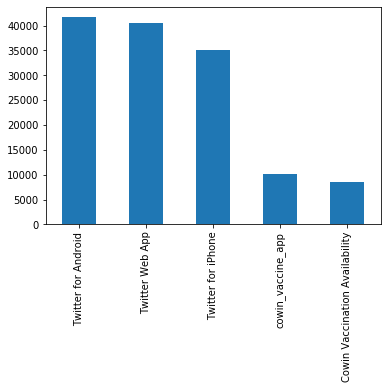

In [20]:
# which device are people tweeting about the vaccine from?
df['source'].value_counts().head(n=5).plot.bar()

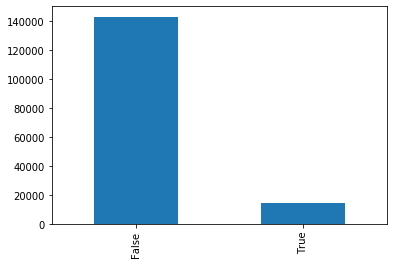

In [21]:
df['user_verified'].value_counts().head(n=10).plot.bar()

In [22]:
df[df['user_verified'] == True].head()

user_name           user_location  \
3         Charles Adler  Vancouver, BC - Canada   
7   Dr.Krutika Kuppalli                     NaN   
12                 WION                   India   
13  Dr.Krutika Kuppalli                     NaN   
15            City A.M.         London, England   

                                     user_description         user_created  \
3   Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
7   ID, Global Health, VHF, Pandemic Prep, Emergin...  2019-03-25 04:14:29   
12  #WION: World Is One | Welcome to India’s first...  2016-03-21 03:44:54   
13  ID, Global Health, VHF, Pandemic Prep, Emergin...  2019-03-25 04:14:29   
15  London's business newspaper - News, Opinion, a...  2009-06-09 13:53:06   

    user_followers  user_friends  user_favourites  user_verified        date  \
3            49165          3933            21853           True  2020-12-12   
7            21924           593             7815           True  2020-12-12   
12          292510            91             7531           True  2020-12-12   
13           21924           593             7815           True  2020-12-12   
15           66224           603              771           True  2020-12-12   

                                                 text  \
3   Facts are immutable, Senator, even when you're...   
7   There have not been many bright days in 2020 b...   
12  The agency also released new information for h...   
13  For all the women and healthcare providers who...   
15  Trump announces #vaccine rollout 'in less than...   

                           hashtags              source  retweets  favorites  \
3                               NaN     Twitter Web App       446       2129   
7   ['BidenHarris', 'Election2020']  Twitter for iPhone         2         22   
12                              NaN           TweetDeck         0         18   
13               ['PfizerBioNTech']  Twitter for iPhone        48         82   
15                      ['vaccine']  Twitter for iPhone         0          1   

    is_retweet  
3        False  
7        False  
12       False  
13       False  
15       False

In [23]:
# what are the top 10 most retweeted tweets
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

text  \
68358        RDIF, Laboratorios Richmond launched production of #SputnikV in Argentina, the first country in Latin America to ma… https://t.co/oEMaUwVR92   
46053                  Why we need Two Doses of mRNA Vaccine 💉 #vaccines #COVID19 #Pfizer #moderna #VaccinesSaveLives #vaccinated https://t.co/RFRmPAyubD   
54674        We completely reject the false and malicious reporting by @CNBCTV18News on COVAXIN® supplies to international marke… https://t.co/OXgKYg2YLL   
66822        ICMR study shows #COVAXIN neutralises against multiple variants of SARS-CoV-2 and effectively neutralises the doubl… https://t.co/0IYwr0KymJ   
68306             Argentine Health Minister @carlavizzotti and Presidential Adviser @cecilianicolini celebrate the production of… https://t.co/E9cPPA5Twf   
76306  #Argentina's actor breaks into a live TV to show his #SputnikV vaccination certificate &amp; express his gratitude. \n\nT… https://t.co/N1NwjkD83y   
17118                                          Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf   
53045            I see it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna… https://t.co/eoqT74V78A   
75232          It’s 72 hours since @BharatBiotech announced that it will transfer production details to whoever wants to produce… https://t.co/ixrqS87R6X   
7126     New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO   

             date             user_name              user_location  \
68358  2021-04-20             Sputnik V            Moscow, Russia    
46053  2021-04-01        hotvickkrishna              Manhattan, NY   
54674  2021-04-08         BharatBiotech           Hyderabad, India   
66822  2021-04-21                  ICMR                  New Delhi   
68306  2021-04-20             Sputnik V            Moscow, Russia    
76306  2021-05-19             Sputnik V            Moscow, Russia    
17118  2021-03-01     Dr. S. Jaishankar           New Delhi, India   
53045  2021-04-12             dawnymock  Fredericton New Brunswick   
75232  2021-05-17          B L Santhosh           New Delhi, India   
7126   2021-02-10  Robert F. Kennedy Jr     Los Angles, California   

                                                                              hashtags  \
68358                                                                     ['SputnikV']   
46053  ['vaccines', 'COVID19', 'Pfizer', 'moderna', 'VaccinesSaveLives', 'vaccinated']   
54674                                                                              NaN   
66822                                                                      ['COVAXIN']   
68306                                                                              NaN   
76306                                                        ['Argentina', 'SputnikV']   
17118                                                                      ['Covaxin']   
53045                                        ['covid', 'vaccine', 'pfizer', 'moderna']   
75232                                                                              NaN   
7126                                                                          ['mRNA']   

       favorites  retweets  
68358      25724     11288  
46053      19622      7695  
54674      15944      6018  
66822      11995      4851  
68306      15148      4105  
76306      14412      2550  
17118      22815      2360  
53045      10175      2299  
75232       7030      2294  
7126        3090      2247

In [24]:
df.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

text  \
3      Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4   
13                 For all the women and healthcare providers who have been asking about the safety of the #PfizerBioNTech… https://t.co/ow0Pglkwte   
35                              An immigrant Muslim couple find the COVID-19 Vaccine. \n\n#CovidVaccine #PfizerBioNTech #Pfizervaccine #PfizerProud   
295    New PODCAST: Vaccinating Our Way Out of the Pandemic\n@larrybrilliant, @PeterHotez &amp; @RaySuarezNews discuss the… https://t.co/ZETygVRafP   
296    Eric Shawn: The vaccine is here...in record time! https://t.co/Vu2awzLgjM thanks @EricShawnTV @ArthelNeville for al… https://t.co/qUsLDXGsAX   
7       There have not been many bright days in 2020 but here are some of the best \n1. #BidenHarris winning #Election2020… https://t.co/77u4f8XXfx   
293                 #UnitedStates : The Federal Aviation Administration (FAA) said Saturday it had approved the use of the… https://t.co/xvwUEvZZk2   
12     The agency also released new information for health care providers and for patients as the US shipped millions of d… https://t.co/sG6BtD7jD9   
25   No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgovuk and #PfizerBioNTech @pfizer for making the #CovidVaccine dream poss… https://t.co/3KvJ7UP432   
17           Coronavirus: Iran reports 8,201 new cases, 221 deaths in the last 24 hours #Iran #coronavirus #PfizerBioNTech… https://t.co/mwDNAdmb7F   

           date                    user_name             user_location  \
3    2020-12-12                Charles Adler    Vancouver, BC - Canada   
13   2020-12-12          Dr.Krutika Kuppalli                       NaN   
35   2020-12-12  Shahjhan Malik | #WearAMask  Nottinghamshire, England   
295  2020-12-12                World Affairs         San Francisco, CA   
296  2020-12-12               Marc Siegel MD                       NaN   
7    2020-12-12          Dr.Krutika Kuppalli                       NaN   
293  2020-12-12                      DD News          New Delhi, India   
12   2020-12-12                         WION                     India   
25   2020-12-12              Devan Surendran       Nottingham, England   
17   2020-12-12                        ILKHA                   Türkiye   

                                                               hashtags  \
3                                                                   NaN   
13                                                   ['PfizerBioNTech']   
35   ['CovidVaccine', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerProud']   
295                                                                 NaN   
296                                                                 NaN   
7                                       ['BidenHarris', 'Election2020']   
293                                                    ['UnitedStates']   
12                                                                  NaN   
25                    ['ThankYouNHS', 'PfizerBioNTech', 'CovidVaccine']   
17                            ['Iran', 'coronavirus', 'PfizerBioNTech']   

     favorites  retweets  
3         2129       446  
13          82        48  
35          37         2  
295         34        10  
296         32         8  
7           22         2  
293         21         4  
12          18         0  
25          10         1  
17           5         3

Sentiment Analysis
We will be using the TextBlob library to perform sentiment analysis on the tweets in our dataset. TextBlob provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. That said, there are numerous other packages with similar capabilities that are worth exploring, including sklearn, nltk, vader, allennlp, and more.

In [25]:
testimonial = TextBlob("So excited to get my vaccine!")
print(testimonial.sentiment)
testimonial = TextBlob("Is the vaccine painful?")
print(testimonial.sentiment)
testimonial = TextBlob("The Pfizer vaccine is now FDA approved")
print(testimonial.sentiment)


Sentiment(polarity=0.46875, subjectivity=0.75)
Sentiment(polarity=-0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)


In [26]:
testimonial = TextBlob("I tested positive for COVID-19")
print(testimonial.sentiment)

Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)


In [27]:
testimonial = TextBlob("I tested positive for COVID-19")
print(testimonial.sentiment)

Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)


In [28]:
# tweet from Texas Governor Greg Abbott
text = """
Today Texas surpassed 8 million vaccinations. It was just 4 days ago that we passed 7 million.

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.

Hospitalizations went down again also.

Great job Texans!

Vaccines are always voluntary, never forced.
"""
blob = TextBlob(text)

In [29]:
print("Tags")
print(blob.tags, end="\n\n")

print("Noun Phrases")
print(blob.noun_phrases, end="\n\n")

print("Words")
print(blob.words, end="\n\n")

print("Sentences")
print(blob.sentences, end="\n\n")

Tags
[('Today', 'NN'), ('Texas', 'NNP'), ('surpassed', 'VBD'), ('8', 'CD'), ('million', 'CD'), ('vaccinations', 'NNS'), ('It', 'PRP'), ('was', 'VBD'), ('just', 'RB'), ('4', 'CD'), ('days', 'NNS'), ('ago', 'RB'), ('that', 'IN'), ('we', 'PRP'), ('passed', 'VBD'), ('7', 'CD'), ('million', 'CD'), ('The', 'DT'), ('positivity', 'NN'), ('rate', 'NN'), ('dropped', 'VBD'), ('even', 'RB'), ('lower', 'JJR'), ('to', 'TO'), ('6.08', 'CD'), ('%', 'NN'), ('the', 'DT'), ('lowest', 'JJS'), ('since', 'IN'), ('May', 'NNP'), ('31st', 'CD'), ('Hospitalizations', 'NNS'), ('went', 'VBD'), ('down', 'RB'), ('again', 'RB'), ('also', 'RB'), ('Great', 'NNP'), ('job', 'NN'), ('Texans', 'NNPS'), ('Vaccines', 'NNS'), ('are', 'VBP'), ('always', 'RB'), ('voluntary', 'JJ'), ('never', 'RB'), ('forced', 'VBN')]

Noun Phrases
['texas', 'positivity rate', 'may', 'hospitalizations', 'great job', 'vaccines']

Words
['Today', 'Texas', 'surpassed', '8', 'million', 'vaccinations', 'It', 'was', 'just', '4', 'days', 'ago', 'that'

In [30]:
for sentence in blob.sentences:
    print(sentence)
    print("polarity:", sentence.sentiment.polarity)
    print("subjectivity:", sentence.sentiment.subjectivity)
    print()


Today Texas surpassed 8 million vaccinations.
polarity: 0.0
subjectivity: 0.0

It was just 4 days ago that we passed 7 million.
polarity: 0.0
subjectivity: 0.0

The positivity rate dropped even lower--to 6.08%--the lowest since May 31st.
polarity: 0.0
subjectivity: 0.0

Hospitalizations went down again also.
polarity: -0.15555555555555559
subjectivity: 0.2888888888888889

Great job Texans!
polarity: 1.0
subjectivity: 0.75

Vaccines are always voluntary, never forced.
polarity: 0.15000000000000002
subjectivity: 0.2



In [31]:
# let's apply the TextBlob API onto our tweet data to perform sentiment analysis!
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df.head()

user_name              user_location  \
0            Rachel Roh  La Crescenta-Montrose, CA   
1           Albert Fong          San Francisco, CA   
2              eli🇱🇹🇪🇺👌                   Your Bed   
3         Charles Adler     Vancouver, BC - Canada   
4  Citizen News Channel                        NaN   

                                                                                                                                    user_description  \
0                                   Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻   
1            Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.   
2                                                                                                                                     heil, hydra 🖐☺   
3  Hosting "CharlesAdlerTonight" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca   
4                Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views   

          user_created  user_followers  user_friends  user_favourites  \
0  2009-04-08 17:52:46             405          1692             3247   
1  2009-09-21 15:27:30             834           666              178   
2  2020-06-25 23:30:28              10            88              155   
3  2008-09-10 11:28:53           49165          3933            21853   
4  2020-04-23 17:58:42             152           580             1473   

   user_verified        date  \
0          False  2020-12-20   
1          False  2020-12-13   
2          False  2020-12-12   
3           True  2020-12-12   
4          False  2020-12-12   

                                                                                                                                           text  \
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P   
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4   
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq   

                                                                              hashtags  \
0                                                                   ['PfizerBioNTech']   
1                                                                                  NaN   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']   
3                                                                                  NaN   
4                                       ['whereareallthesickpeople', 'PfizerBioNTech']   

                source  retweets  favorites  is_retweet  polarity  \
0  Twitter for Android         0          0       False      0.00   
1      Twitter Web App         1          1       False     -0.50   
2  Twitter for Android         0          0       False      0.00   
3      Twitter Web App       446       2129       False     -0.05   
4   Twitter for iPhone         0          0       False      0.00   

   subjectivity  
0      0.125000  
1      0.900000  
2      0.033333  
3      0.550000  
4      0.000000

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text yticklabel objects>)

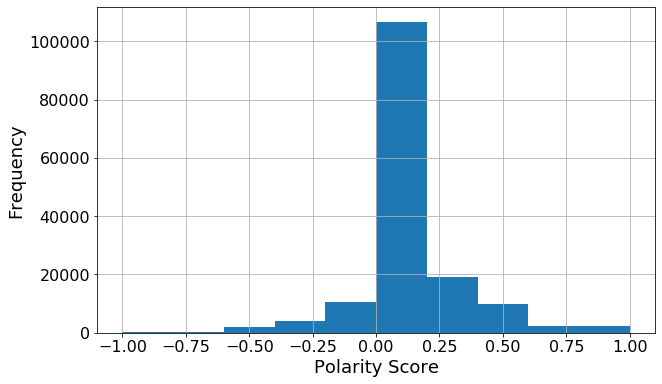

In [33]:
fig = plt.figure(figsize=(10, 6))
df['polarity'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]),
 <a list of 10 Text yticklabel objects>)

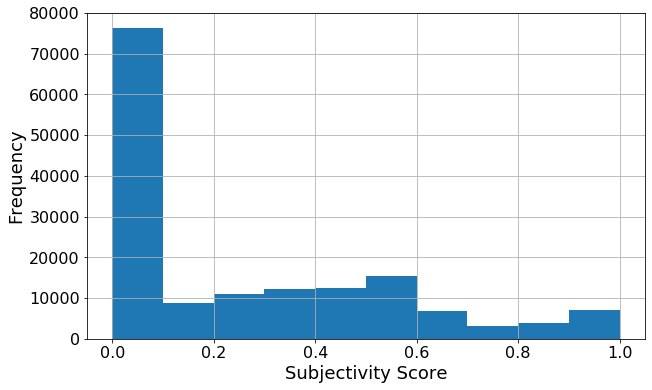

In [34]:
fig = plt.figure(figsize=(10, 6))
df['subjectivity'].hist()
plt.xlabel('Subjectivity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


# Inspection

In [35]:
# inspect the most negatively charged tweets
df.sort_values(by='polarity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0                                                                           Let the #Moderna #seconddose chronicles begin. Hoping for a boring story 🤞🏾🤞🏾   
1                             My enemies are getting very dangerous day by day!!!! #CovidVic #COVAXIN @Corona_mandai #COVIDSHIELD https://t.co/FeRSARquJ6   
2          COVID shot #2 is vicious.\n\nMidnight: Time to stop working, maybe this shot won’t affect me at all.\n3 AM: shivering… https://t.co/IF1h3c4XH1   
3           “I had the worst chills and fever of my life.”\n“I got a rash all over my arm.”\n“I was throwing up after the second… https://t.co/dgqtWSZQs4   
4                                                         Worst decision ever by govt to charge for vaccine. #Covishield #Covaxin https://t.co/pJqOn0oLvH   
5                                                                   @MicheleBerdy I thought #SputnikV was evil and used as a Trojan Horse by VVP himself?   
6            Vaccine side effects hack: take a Benadryl immediately after getting your shot. I’ve heard a lot of nasty side effe… https://t.co/tdO1Y5hFEc   
7           @MikaLintila #ADE - The Worst Case Scenario. \nNow #Pfizer and #Moderna are trying to save vaccine takers with their… https://t.co/XNiUdZnGdq   
8           Why just using #NordStream2 ? The evil 🇷🇺  should be doing it with #NS1 as well!\nOh wait! They will do it when 🇪🇺 c… https://t.co/JNPH73xiDU   
9  Which #Vaccine they were using??? \n#Sinovac is worst &amp; so as #Pfizer &amp; #Morderna the #Israel is struggling.\nTheir a… https://t.co/gIitDtmdfN   

   polarity  subjectivity  
0      -1.0           1.0  
1      -1.0           1.0  
2      -1.0           1.0  
3      -1.0           1.0  
4      -1.0           1.0  
5      -1.0           1.0  
6      -1.0           1.0  
7      -1.0           1.0  
8      -1.0           1.0  
9      -1.0           1.0

In [36]:
# inspect the most positively charged tweets
df.sort_values(by='polarity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0                      This is some of the best DD made about $OCGN and the people involved in all this #covaxin operation. https://t.co/sD3PTDX7ah   
1                                   @POTUS I'm very proud that our president decides for the best vaccine #Covaxin from @BharatBiotech, @Ocugen 🙏🙏🙏   
2                                                                                               Great!\n#Sinopharm #COVID19 https://t.co/9RFRFfMmtm   
3                                                                                                        @krysboydthink Awesome! Team #moderna here   
4           BEST  TOY GIFT FOR A KID  \n\nhttps://t.co/psovpiqaki\n\n#CGBudget2021 #COVAXIN #HBDMKStalin #MondayMotivation… https://t.co/RNUtuwYQHF   
5   Loved this! 🤩Yes, get vaccinated!! \n#Covaxin #Covishild #COVAX \n\n@UNESCO trains journalists on reporting accurately… https://t.co/F2Kya3KcDH   
6         Sunset over Chilika. Beautiful? Do visit when you can! \n\n#Covaxin #sunset #photooftheday #photography #weekend… https://t.co/waMSJ93UdY   
7        Thank you @CUH_NHS @CPFT_NHS @CPFT_Research @StephenLegood !  Excellent roll out of COVID19 Vaccination programme… https://t.co/GKnfjEJluh   
8  This is despite Israel having the #PfizerBiontech vaccine which is considered the best. #Johnson &amp; his @CMO_England… https://t.co/ARN6oSbZHZ   
9                                                                            Truly wonderful news! #COVID19 #PfizerBioNTech https://t.co/vvvUm4d4xQ   

   polarity  subjectivity  
0       1.0          0.30  
1       1.0          0.65  
2       1.0          0.75  
3       1.0          1.00  
4       1.0          0.30  
5       1.0          0.80  
6       1.0          1.00  
7       1.0          1.00  
8       1.0          0.30  
9       1.0          1.00

In [37]:
# inspect the most subjective tweets (NOTE: subjectivity scale ranges from 0 to 1)
df.sort_values(by='subjectivity', ascending=True)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0                                                                   Got the 1st jab of #Sinovac Covid-19 vaccine 💉. Thank you @GovtofPakistan .   
1                                                                                               Just got a jab. Didn't feel a thing. #moderna 👍   
2                                                      Another batch of #Sinovac COVID-19 vaccines arrive in Indonesia\nhttps://t.co/KbRn0pWRul   
3   Global coronavirus death toll reaches 3,876,138 #CoronavirusPandemic #AstraZeneca #Sinovac\nhttps://t.co/dyyiMvyUyf https://t.co/VHPY3LKh3g   
4                                                                 1st dose done!💉\n#QCProtekTODO \n#RESBAKUNA\n#Sinovac https://t.co/qESnXPwkBs   
5                                                                                                                   @meiselasb Me too! #Moderna   
6                                                                                              Please get vaccinated. #Pfizer #Moderna #Janssen   
7  2nd dose of the #Moderna done today. Hopefully we keep up this pace with the #vaccines and get back to some level o… https://t.co/d2SplTiccc   
8                                                                                           My 2nd \n#Sinovac\n#COVID19 https://t.co/RhqqKeVjBt   
9                                                                          1st dose of CoViD-19 vaccine done.\n#Sinovac https://t.co/XyujPW6Un7   

   polarity  subjectivity  
0       0.0           0.0  
1       0.0           0.0  
2       0.0           0.0  
3       0.0           0.0  
4       0.0           0.0  
5       0.0           0.0  
6       0.0           0.0  
7       0.0           0.0  
8       0.0           0.0  
9       0.0           0.0

In [38]:
# inspect the most objective tweets
df.sort_values(by='subjectivity', ascending=False)[['text', 'polarity', 'subjectivity']].reset_index(drop=True).head(n=10)

text  \
0    @CNN @ChrisCuomo @donlemon Help!  Canada has gone STUPID!!!  The provincial government in Ontario, Canada, is delay… https://t.co/AshZX7mKBY   
1  Income tax payers should be also given #vaccines now on priority.... We are only 3+ crores.\n\nIf we die, how will th… https://t.co/MVGUXixv00   
2                                                              Why Modi takes vaccine from nurses only ?\n#vaccines \n#COVIDSecondWave \n#Covaxin   
3                                         #CovidVaccine tomorrow and hoping I get #Moderna so that I can do a “funny” Dolly Parton vaccine joke 😂   
4                           Compassion can only be built from understanding. \n\n#COVID19 #Pfizer #Moderna #vaccine #mrna https://t.co/pRal8eoqKB   
5    @BSBommai @CMofKarnataka @narendramodi @MoHFW_INDIA @DHFWKA @JoshiPralhad @JagadishShettar sirs. V vl b very glad t… https://t.co/KLiKYm9cai   
6             Coronavirus worldwide: The number of confirmed cases reaches 115,397,740 #CoronaVac #Sinovac @Worldometers… https://t.co/R2Qpv62ZwW   
7    @BlauBaron So you have only four acceptable vaccine types at the moment, #Pfizer, #Moderna, #Novavax, and #sputnikV… https://t.co/90LL6ouMze   
8    [23:14:51] 421102, 29-07-2021, 15 dose2 at KDMCP SHWAAS-NX HOSPITAL MOHON, #COVAXIN 1st Flr Krishna Plaza Apt Bazar… https://t.co/QCHmZPy5I6   
9    Out of the three vaccines approved for use in India, only one— #Covishield —features on the emergency use listing o… https://t.co/vcVq83oAUX   

   polarity  subjectivity  
0     -1.00           1.0  
1      0.00           1.0  
2      0.00           1.0  
3      0.25           1.0  
4      0.00           1.0  
5      0.65           1.0  
6      0.40           1.0  
7      0.00           1.0  
8      0.60           1.0  
9      0.00           1.0

In [39]:
# let's inspect how many tweets there were with respect to time
timeline = df.groupby(['date']).count().reset_index()
timeline['count'] = timeline['text']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()
# fig.write_image("./figures/tweet_freq_over_time.png")

# Time Series Sentiment Analysis

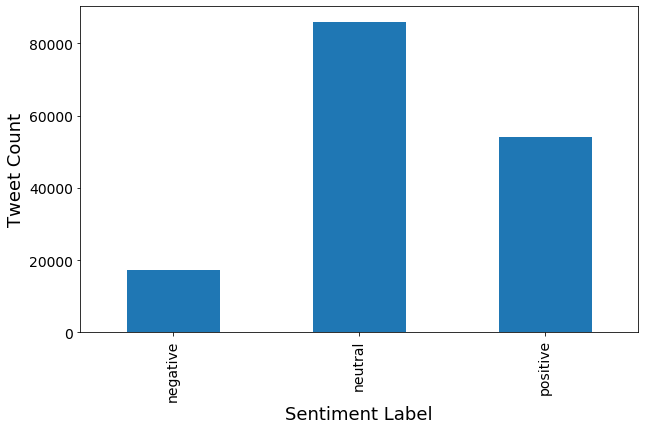

<Figure size 432x288 with 0 Axes>

In [41]:
# polarity values ranging from -1 to 1 are really useful for sentiment analysis
# but let's convert our data to 3 classes (negative, neutral, and positive) so that we can visualize it
criteria = [df['polarity'].between(-1, -0.01), df['polarity'].between(-0.01, 0.01), df['polarity'].between(0.01, 1)]
values = ['negative', 'neutral', 'positive']
df['sentiment'] = np.select(criteria, values, 0)

# plot sentiment counts
fig = plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()



In [42]:
timeline = df.groupby(['date']).agg(np.nanmean).reset_index()
timeline['count'] = df.groupby(['date']).count().reset_index()['retweets']
timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
timeline["polarity"] = timeline["polarity"].astype(float)
timeline["subjectivity"] = timeline["subjectivity"].astype(float)
timeline

date  count  polarity  retweets  favorites  subjectivity
0    2020-12-12     63  0.067223  8.650794  38.793651      0.259678
1    2020-12-13     98  0.105537  1.673469   7.306122      0.273242
2    2020-12-14    137  0.113316  3.284672  19.065693      0.275353
3    2020-12-15    150  0.117846  1.333333  10.106667      0.309868
4    2020-12-16    144  0.110607  1.409722   7.909722      0.296451
..          ...    ...       ...       ...        ...           ...
209  2021-08-03   1005  0.092488  2.247761   7.303483      0.285599
210  2021-08-04    945  0.079798  1.697354   6.703704      0.246264
211  2021-08-05   1216  0.108937  5.677632  23.986842      0.259334
212  2021-08-06    968  0.098298  0.829545   3.542355      0.265681
213  2021-08-07    295  0.105696  0.532203   2.413559      0.287504

[214 rows x 6 columns]

In [43]:
timeline.sort_values(by='polarity', ascending=False)

date  count  polarity  retweets  favorites  subjectivity
31   2021-01-12    106  0.194071  0.735849   6.716981      0.319507
12   2020-12-24    114  0.184444  2.570175  14.043860      0.340104
11   2020-12-23    123  0.177668  2.065041  11.365854      0.299824
47   2021-01-28     80  0.172677  0.850000   3.950000      0.359007
24   2021-01-05    111  0.166172  1.324324  10.324324      0.298039
..          ...    ...       ...       ...        ...           ...
207  2021-08-01   1154  0.038997  1.158579   3.355286      0.140130
174  2021-06-24   1505  0.038615  1.546179   6.782060      0.155454
175  2021-06-25   1944  0.037154  0.773148   3.179012      0.134730
194  2021-07-19   2084  0.034137  0.463532   1.559021      0.112753
198  2021-07-23   2206  0.032041  0.508160   1.876247      0.111312

[214 rows x 6 columns]

In [46]:
df[df['date'].astype(str) == '2021-08-07'][['user_location', 'date', 'text', 'hashtags', 'polarity', 'subjectivity', 'sentiment']]

user_location        date  \
151969                     NaN  2021-08-07   
151970                     NaN  2021-08-07   
151971  Kuala Lumpur, Malaysia  2021-08-07   
151972        Kuching, Sarawak  2021-08-07   
152083         Georgia,Tbilisi  2021-08-07   
...                        ...         ...   
158227        Bengaluru, India  2021-08-07   
158228        Bengaluru, India  2021-08-07   
158229                     NaN  2021-08-07   
158230             Houston, TX  2021-08-07   
158231             Houston, TX  2021-08-07   

                                                                                                                                                    text  \
151969      Visiting #Cork this weekend? Covid-19 #PfizerBiontech vaccinations are available at our 'Walk-In' clinic at City Ha… https://t.co/Y5VAAwu45v   
151970   Maíre Flynn &amp; her team are ready to vaccinate Walk-In's this morning at Kerry Sports Academy in Tralee from 9.15am… https://t.co/azFcpUZGCI   
151971    #askmani Yeay!!!Vaccinated ✅ #2ndDose #PfizerBioNTech  #vaccine #COVID_19\n\nCOVID-19 vaccines are safe, getting vacc… https://t.co/6arBfDYi9G   
151972                                                                                                                  vaccination day\n#PfizerBiontech   
152083                                                                    My step to fight against #COVID19 ##Sinopharm #Georgia https://t.co/iGhFmS9tXA   
...                                                                                                                                                  ...   
158227   18-44 #BBMP #Bengaluru #CovidVaccine Availability for 07/08 at 07:00AM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose1… https://t.co/7PlNzyeCf8   
158228   18-44 #URBAN #Bengaluru #CovidVaccine Availability for 07/08 at 07:00AM\nFREE Slots 0\nPAID Slots \n#COVISHIELD - Dose… https://t.co/g1vqdrzvKt   
158229      #Covidupdate | India records over 38,696 cases in the last 24 hours\n\n#COVID19 | #COVIDSecondWave | #vaccination |… https://t.co/8NU9enae1A   
158230      From what I can tell, Bolivia is exporting millions of its received #SputnikV doses to Colombia. It wasn't hard for… https://t.co/x1GhNFVW0h   
158231  I'm getting the #SputnikV vaccine tomorrow...  Seen to be 91.6% effective against the Delta variant, vs J&amp;J's 50-66… https://t.co/0jI5GwRd6f   

                                                               hashtags  \
151969                                       ['Cork', 'PfizerBiontech']   
151970                                                              NaN   
151971  ['askmani', '2ndDose', 'PfizerBioNTech', 'vaccine', 'COVID_19']   
151972                                               ['PfizerBiontech']   
152083                              ['COVID19', 'Sinopharm', 'Georgia']   
...                                                                 ...   
158227              ['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']   
158228             ['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISHIELD']   
158229     ['Covidupdate', 'COVID19', 'COVIDSecondWave', 'vaccination']   
158230                                                     ['SputnikV']   
158231                                                     ['SputnikV']   

        polarity  subjectivity sentiment  
151969  0.400000      0.400000  positive  
151970  0.200000      0.500000  positive  
151971  0.500000      0.500000  positive  
151972  0.000000      0.000000   neutral  
152083  0.000000      0.000000   neutral  
...          ...           ...       ...  
158227  0.400000      0.800000  positive  
158228  0.200000      0.400000  positive  
158229  0.000000      0.066667   neutral  
158230 -0.291667      0.541667  negative  
158231  0.600000      0.800000  positive  

[295 rows x 7 columns]

In [48]:
# Plot tweets over time, color-coded by average polarity score
fig = px.bar(timeline, x='date', y='count', color='polarity')
fig.show()

# Filter by Vaccine

In [50]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik', 'covishield']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine-- not very helpful!
def filter_by_vaccy(df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(df[df['text'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date']).agg(np.nanmean).reset_index()
    timeline['count'] = df_filt.groupby(['date']).count().reset_index()['retweets']
    timeline = timeline[['date', 'count', 'polarity', 'retweets', 'favorites', 'subjectivity']]
    timeline["polarity"] = timeline["polarity"].astype(float)
    timeline["subjectivity"] = timeline["subjectivity"].astype(float)
    return df_filt, timeline

In [51]:
pfizy_df, pfizy_timeline = filter_by_vaccy(df, ['pfizer', 'biontech'])
print(pfizy_df.shape)
fig = px.bar(pfizy_timeline, x='date', y='count', color='polarity')
fig.show()

(12451, 18)


In [52]:
moderna_df, moderna_timeline = filter_by_vaccy(df, ['moderna'])
print(moderna_df.shape)
fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
fig.show()

(24172, 18)


In [53]:
india_df, india_timeline = filter_by_vaccy(df, ['covaxin', 'covishield'])
print(moderna_df.shape)
fig = px.bar(moderna_timeline, x='date', y='count', color='polarity')
fig.show()

(24172, 18)


# Wordclouds


In [62]:
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
import math
import random
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

[nltk_data] Downloading package wordnet to /Users/appy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/appy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(-0.5, 999.5, 499.5, -0.5)

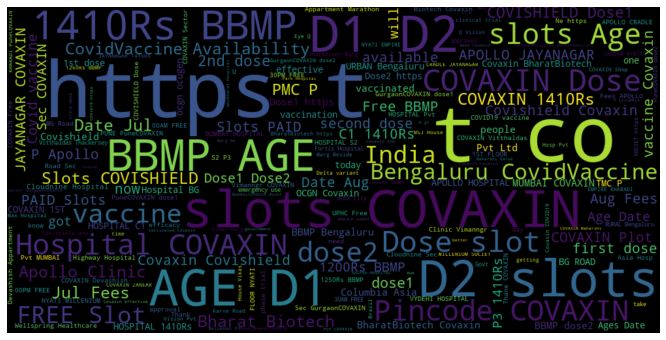

In [63]:
tweet_df = india_df
words = ' '.join([word for word in tweet_df['text']])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=120).generate(words)

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

# Advanced

In [64]:
def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
#     plt.show();
    return fig

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    # print(top_n_words)
    return top_n_words
    
def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud

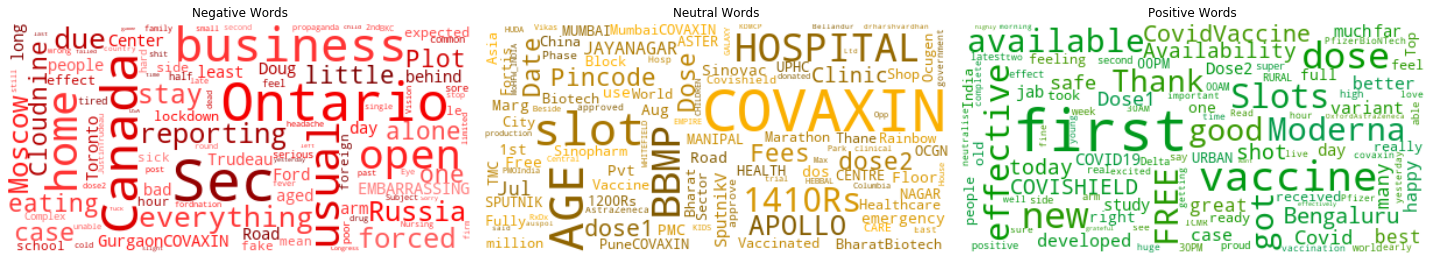

In [65]:
def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    fig = generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    return fig

# Convert string to a list of words
wordcloud_df = df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("sentiment_wordclouds.png", bbox_inches="tight")

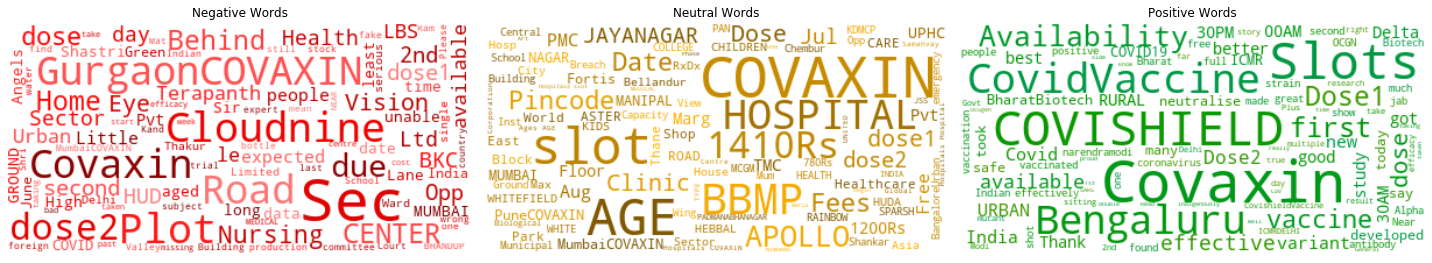

In [66]:
wordcloud_df = india_df
wordcloud_df['words'] = wordcloud_df.text.apply(lambda x:re.findall(r'\w+', x ))
get_smart_clouds(wordcloud_df).savefig("pfizy_sentiment_wordclouds.png", bbox_inches="tight")